In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import pickle

In [2]:
audi = pd.read_csv('dataset/audi.csv')
bmw = pd.read_csv('dataset/bmw.csv')
ford = pd.read_csv('dataset/ford.csv')
hyundai = pd.read_csv('dataset/hyundi.csv')
mercedes = pd.read_csv('dataset/merc.csv')
skoda = pd.read_csv('dataset/skoda.csv')
toyota = pd.read_csv('dataset/toyota.csv')
vw = pd.read_csv('dataset/vw.csv')

In [3]:
audi['brand'] = 'Audi'
bmw['brand'] = 'BMW'
ford['brand'] = 'Ford'
hyundai['brand'] = 'Hyundai'
mercedes['brand'] = 'Mercedes'
skoda['brand'] = 'Skoda'
toyota['brand'] = 'Toyota'
vw['brand'] = 'Volkswagen'

In [4]:
whole_dataset = pd.concat([audi,bmw,ford,hyundai,mercedes,skoda,toyota,vw])
whole_dataset.drop(columns=['tax(£)','tax'], axis=1, inplace=True)

In [5]:
column_names = ['brand','model','mileage','transmission','fuelType','mpg','engineSize','price']

In [6]:
whole_dataset = whole_dataset.reindex(columns = column_names)
whole_dataset

,brand,model,mileage,transmission,fuelType,mpg,engineSize,price
0,Audi,A1,15735,Manual,Petrol,55.4,1.4,12500
1,Audi,A6,36203,Automatic,Diesel,64.2,2.0,16500
2,Audi,A1,29946,Manual,Petrol,55.4,1.4,11000
3,Audi,A4,25952,Automatic,Diesel,67.3,2.0,16800
4,Audi,A3,1998,Manual,Petrol,49.6,1.0,17300
...,...,...,...,...,...,...,...,...
15152,Volkswagen,Eos,74000,Manual,Diesel,58.9,2.0,5990
15153,Volkswagen,Fox,88102,Manual,Petrol,46.3,1.2,1799
15154,Volkswagen,Fox,70000,Manual,Petrol,42.0,1.4,1590
15155,Volkswagen,Fox,82704,Manual,Petrol,46.3,1.2,1250


In [18]:
whole_dataset['model'].unique()

array([  9,  14,  12,  11, 103, 104,  13, 121, 102,  15, 138, 105, 113,
       110,  16, 106, 111, 112, 108, 126, 123, 127, 120, 122,  10, 114,
         4,   5,   0,   6,   1,   3, 157,   2, 159, 158, 167, 155,  91,
       156, 160,   7, 166, 161,  92, 168,  89,  90,  93, 165,  51,  52,
       101,  86,  46,  29,  94,  81, 145, 119,  25,  47, 144,  67,  80,
        63,  95,  68,  54, 115, 133,  49, 146,  71, 147,  70,  77,  72,
        73,  78,  85, 151,  74,  76, 128,  17, 139,  64,  19, 125, 118,
       124,  55,  60,  57,   8,  24,  59,  27,  45,  56,  35,  33,  32,
       150,  88,  31,  61,  58, 154, 169,  34, 107, 172, 171, 170,  96,
        43, 164, 134,  84, 116,  83,  50, 163, 129, 117,  82,  62,  44,
       109, 162,  21,  23,  28, 100,  22, 152,  69,  97,  87, 135,  41,
       153,  75, 149, 137,  65,  98, 136,  99, 140, 131, 148, 130,  26,
        39,  42, 142,  20, 143,  66,  18, 141, 132,  79,  30,  40,  37,
        36,  38,  48,  53])

In [7]:
"""# Converting type of columns to category
whole_dataset['brand'] = whole_dataset['brand']
whole_dataset['model'] = whole_dataset['model']
whole_dataset['transmission'] = whole_dataset['transmission']
whole_dataset['fuelType'] = whole_dataset['fuelType'] 
  """
lenc1 = preprocessing.LabelEncoder()
lenc2 = preprocessing.LabelEncoder()
lenc3 = preprocessing.LabelEncoder()
lenc4 = preprocessing.LabelEncoder()

# Assigning numerical values and storing it in another columns
whole_dataset['brand'] = lenc1.fit_transform(whole_dataset['brand'])
whole_dataset['model'] = lenc2.fit_transform(whole_dataset['model'])
whole_dataset['transmission'] = lenc3.fit_transform(whole_dataset['transmission'])
whole_dataset['fuelType'] = lenc4.fit_transform(whole_dataset['fuelType'])


In [8]:
whole_dataset

,brand,model,mileage,transmission,fuelType,mpg,engineSize,price
0,0,9,15735,1,4,55.4,1.4,12500
1,0,14,36203,0,0,64.2,2.0,16500
2,0,9,29946,1,4,55.4,1.4,11000
3,0,12,25952,0,0,67.3,2.0,16800
4,0,11,1998,1,4,49.6,1.0,17300
...,...,...,...,...,...,...,...,...
15152,7,48,74000,1,0,58.9,2.0,5990
15153,7,53,88102,1,4,46.3,1.2,1799
15154,7,53,70000,1,4,42.0,1.4,1590
15155,7,53,82704,1,4,46.3,1.2,1250


In [9]:
whole_dataset

,brand,model,mileage,transmission,fuelType,mpg,engineSize,price
0,0,9,15735,1,4,55.4,1.4,12500
1,0,14,36203,0,0,64.2,2.0,16500
2,0,9,29946,1,4,55.4,1.4,11000
3,0,12,25952,0,0,67.3,2.0,16800
4,0,11,1998,1,4,49.6,1.0,17300
...,...,...,...,...,...,...,...,...
15152,7,48,74000,1,0,58.9,2.0,5990
15153,7,53,88102,1,4,46.3,1.2,1799
15154,7,53,70000,1,4,42.0,1.4,1590
15155,7,53,82704,1,4,46.3,1.2,1250


In [10]:
X = whole_dataset[['brand', 'model','mileage','transmission','fuelType','mpg','engineSize']]
y = whole_dataset['price']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 7)

In [12]:
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [13]:
model = RandomForestRegressor()
model.fit(X_train_scaled, np.log(y_train))

RandomForestRegressor()

In [14]:
y_pred = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("mean_absolute_error: %.2f" % mean_absolute_error(y_test, y_pred))


Mean squared error: 411019365.63
mean_absolute_error: 17669.06


c:\Users\Burak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


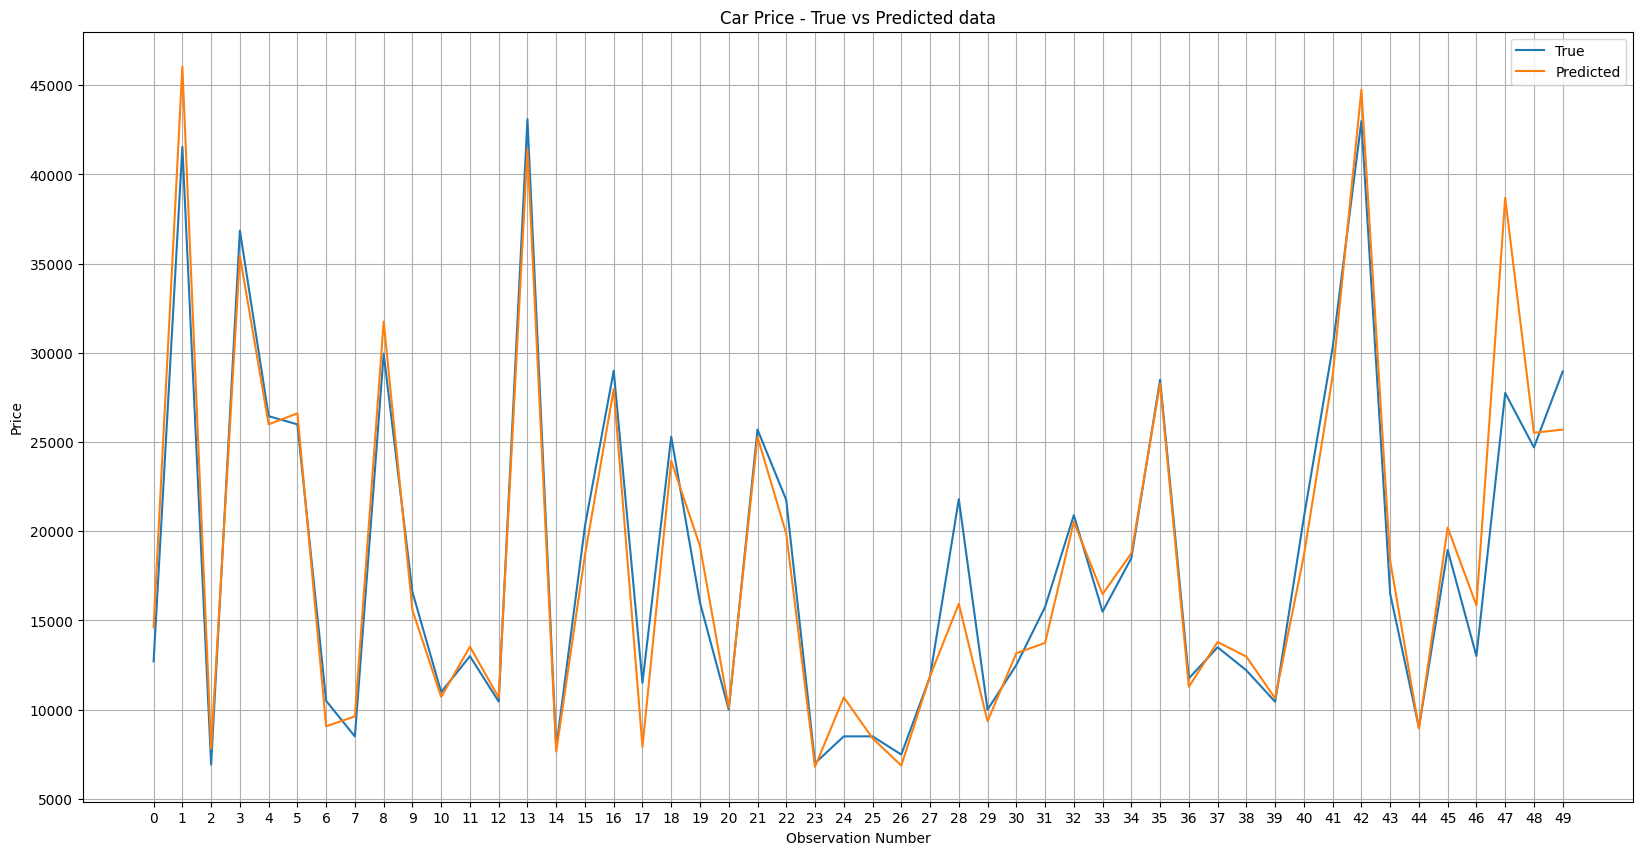

In [20]:
y_pred = np.exp(model.predict(X_test_scaled))
number_of_observations=50
x_ax = range(len(y_test[:number_of_observations]))

plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test[:number_of_observations], label="True")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

In [19]:
y_pred

array([14617.61619898, 46035.60661843,  7811.68458647, ...,
       18171.94420673, 12038.3349638 ,  9538.03169609])

In [16]:
pickle.dump(model, open('model.pkl', 'wb'))